# ANN for Customer Churn Prediction 
### (Binary Cross Entropy)

In [4]:
import tensorflow
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential 
from tensorflow.keras.layers import Dense
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [5]:
df=pd.read_csv('https://raw.githubusercontent.com/Unstopable18/Datasets/main/Churn_Modelling.csv')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [7]:
df.drop(columns=['RowNumber','CustomerId','Surname'],inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [9]:
df.sample(10)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
2553,727,Spain,Male,71,8,0.00,1,1,1,198446.91,1
2024,545,Spain,Female,39,6,0.00,1,0,0,38410.74,1
3873,530,Spain,Male,37,4,0.00,2,1,1,164844.37,0
280,782,France,Male,39,8,0.00,2,1,1,33949.67,0
2380,841,France,Male,34,4,0.00,2,1,0,141582.66,0
3125,736,Spain,Female,26,4,135889.13,1,1,1,165692.03,0
514,605,France,Female,51,3,136188.78,1,1,1,67110.59,1
4807,611,France,Male,28,2,0.00,2,0,0,25395.83,0
5498,563,France,Male,35,3,106250.72,1,0,0,39546.32,0
2012,841,France,Male,74,9,108131.53,1,0,1,60830.38,0


In [10]:
df.Geography.value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [11]:
df.IsActiveMember.value_counts()

1    5151
0    4849
Name: IsActiveMember, dtype: int64

In [12]:
df[df.IsActiveMember==1].Exited.value_counts()

0    4416
1     735
Name: Exited, dtype: int64

In [13]:
df.HasCrCard.value_counts()

1    7055
0    2945
Name: HasCrCard, dtype: int64

In [14]:
df[df.HasCrCard==1].Exited.value_counts()

0    5631
1    1424
Name: Exited, dtype: int64

In [15]:
df=pd.get_dummies(df,columns=['Geography'],drop_first=True)
df.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain
0,619,Female,42,2,0.00,1,1,1,101348.88,1,0,0
1,608,Female,41,1,83807.86,1,0,1,112542.58,0,0,1
2,502,Female,42,8,159660.80,3,1,0,113931.57,1,0,0
3,699,Female,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,Female,43,2,125510.82,1,1,1,79084.10,0,0,1


In [16]:
df=pd.get_dummies(df,columns=['Gender'],drop_first=True)

In [17]:
df.sample()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
9751,681,59,4,122781.51,1,0,1,140166.95,0,0,0,1


In [18]:
X = df.drop(columns=['Exited'])
y = df['Exited'].values
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [19]:
scaler = StandardScaler()
X_train_trf = scaler.fit_transform(X_train)
X_test_trf = scaler.transform(X_test)

In [20]:
model = Sequential()
model.add(Dense(11,activation='relu',input_dim=11))
model.add(Dense(8,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 11)                132       
                                                                 
 dense_1 (Dense)             (None, 8)                 96        
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 237
Trainable params: 237
Non-trainable params: 0
_________________________________________________________________


In [22]:
model.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])

In [23]:
history = model.fit(X_train_trf,y_train,batch_size=50,epochs=200,verbose=1,validation_split=0.2)

Epoch 1/200
128/128 [==============================] - 3s 9ms/step - loss: 0.5648 - accuracy: 0.7623 - val_loss: 0.5109 - val_accuracy: 0.8012
Epoch 2/200
128/128 [==============================] - 0s 3ms/step - loss: 0.4830 - accuracy: 0.8005 - val_loss: 0.4643 - val_accuracy: 0.8019
Epoch 3/200
128/128 [==============================] - 0s 3ms/step - loss: 0.4463 - accuracy: 0.8045 - val_loss: 0.4411 - val_accuracy: 0.8100
Epoch 4/200
128/128 [==============================] - 0s 4ms/step - loss: 0.4247 - accuracy: 0.8156 - val_loss: 0.4241 - val_accuracy: 0.8188
Epoch 5/200
128/128 [==============================] - 0s 4ms/step - loss: 0.4085 - accuracy: 0.8216 - val_loss: 0.4110 - val_accuracy: 0.8269
Epoch 6/200
128/128 [==============================] - 0s 4ms/step - loss: 0.3952 - accuracy: 0.8244 - val_loss: 0.3999 - val_accuracy: 0.8331
Epoch 7/200
128/128 [==============================] - 0s 4ms/step - loss: 0.3837 - accuracy: 0.8345 - val_loss: 0.3915 - val_accuracy: 0.8369

In [24]:
y_pred = model.predict(X_test_trf)
y_pred

63/63 [==============================] - 1s 3ms/step


array([[0.15501384],
       [0.33885315],
       [0.16709022],
       ...,
       [0.10546716],
       [0.1579213 ],
       [0.18769172]], dtype=float32)

In [25]:
y_pred = y_pred.argmax(axis=-1)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [26]:
accuracy_score(y_test,y_pred)

0.7975

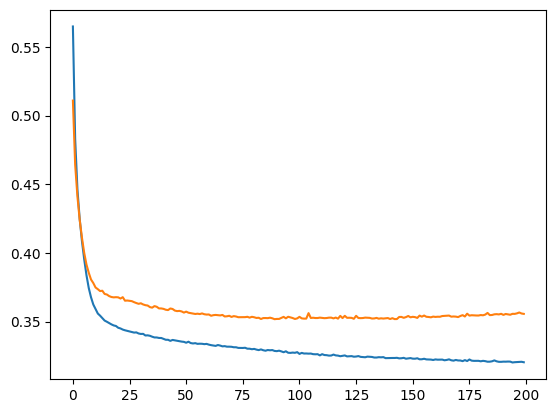

In [27]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

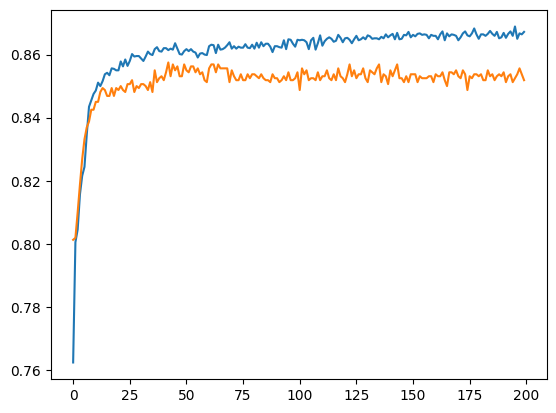

In [28]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])